In [1]:
import numpy as np
import cv2 # OpenCV biblioteka
import matplotlib
import matplotlib.pyplot as plt  

In [2]:
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = 16,12

In [3]:

def load_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
def image_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def image_bin(image_gs):
    height, width = image_gs.shape[0:2]
    image_binary = np.ndarray((height, width), dtype=np.uint8)
    ret, image_bin = cv2.threshold(image_gs, 245, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return image_bin

def invert(image):
    return 255-image

def display_image(image, color=False):
    if color:
        plt.imshow(image)
    else:
        plt.imshow(image, 'gray')

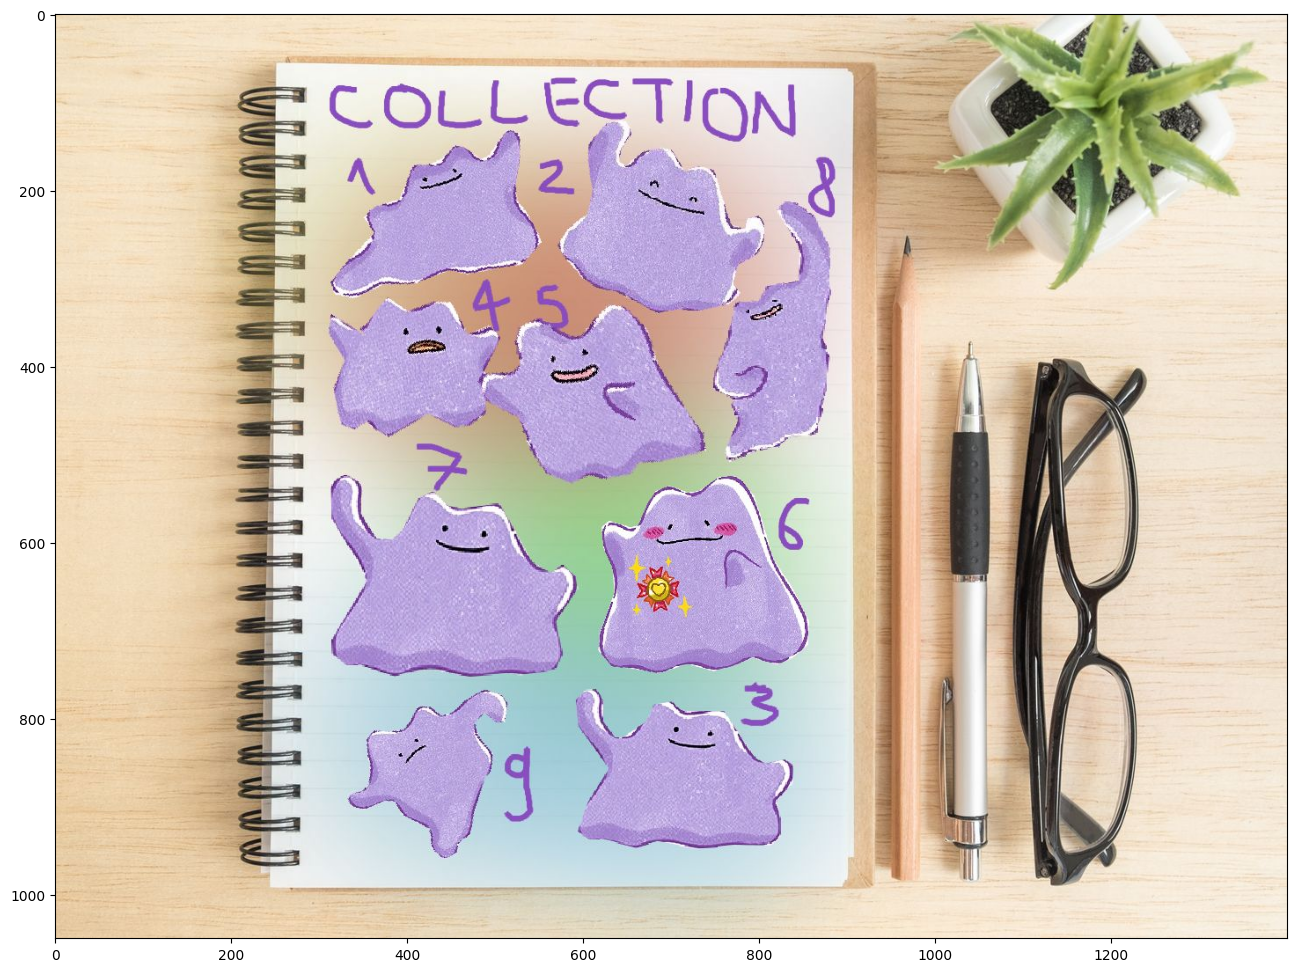

In [59]:
img = load_image('pictures/ditto_v10_notebook.jpg')

display_image(img, color=True)

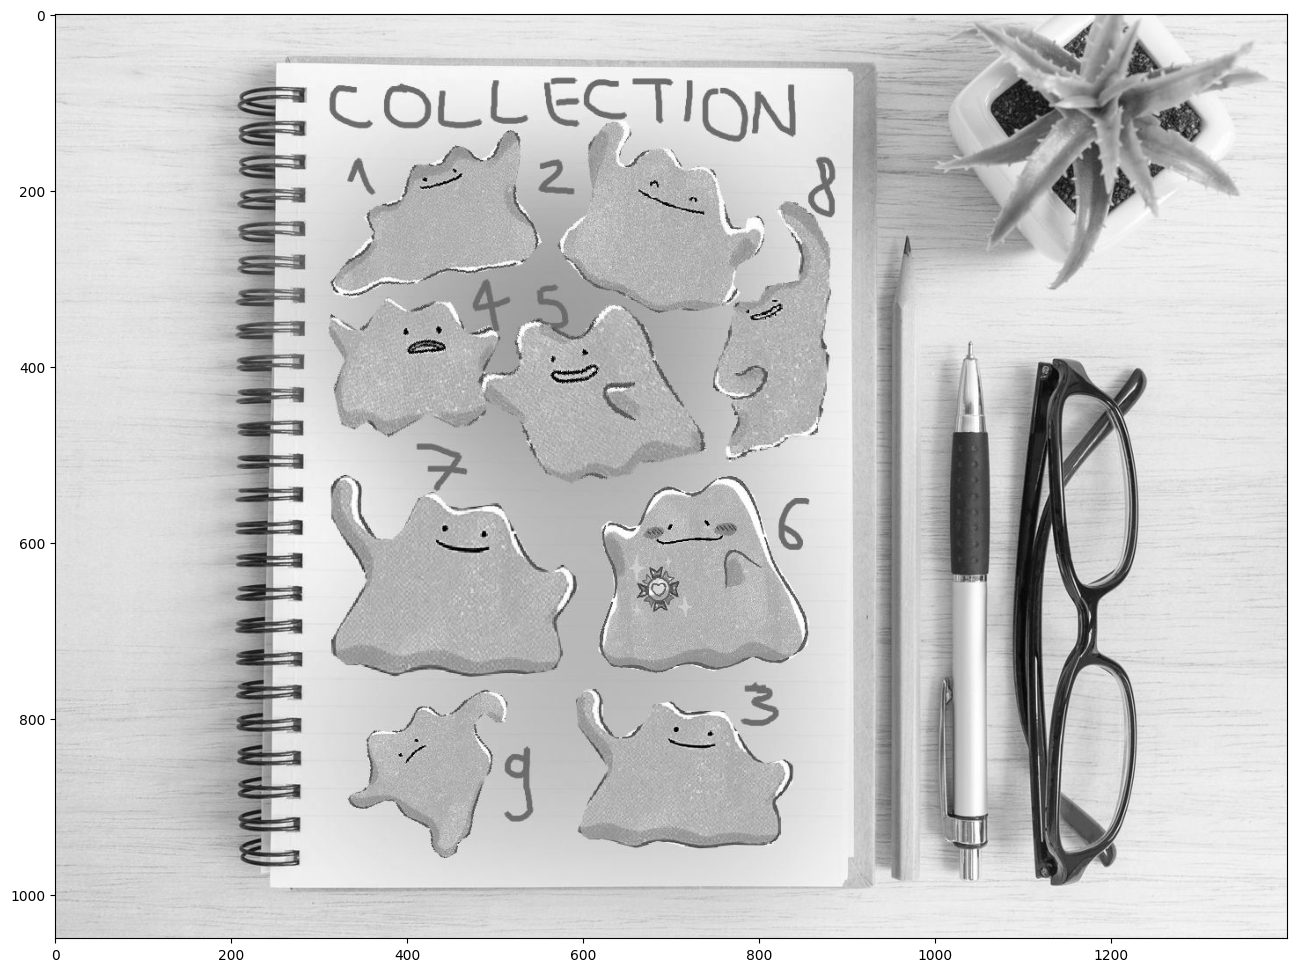

In [77]:
img_gs = image_gray(img)
display_image(img_gs)

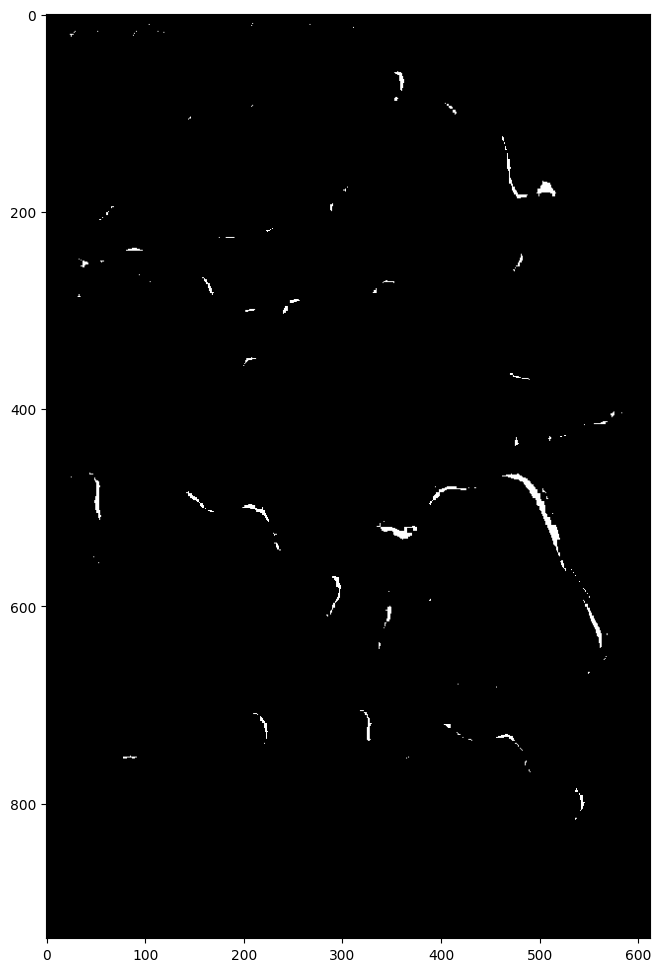

In [97]:
ret, img_bin = cv2.threshold(img_gs, 252, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8) # strukturni element 3x3 blok
opening = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel, iterations = 2) # otvaranje
opening = opening[63:1000, 288:900]
display_image(opening)

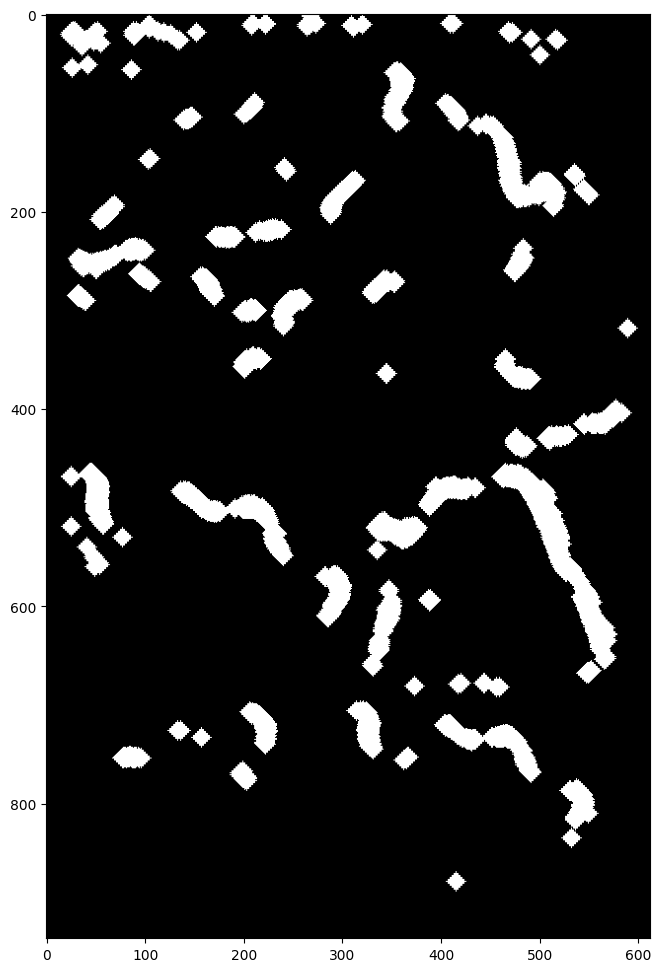

In [82]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5)) # MORPH_ELIPSE, MORPH_RECT
img_dil = cv2.dilate(img_bin, kernel, iterations=5)
#img_dil = cv2.erode(img_dil, kernel, iterations=5)
display_image(img_dil)

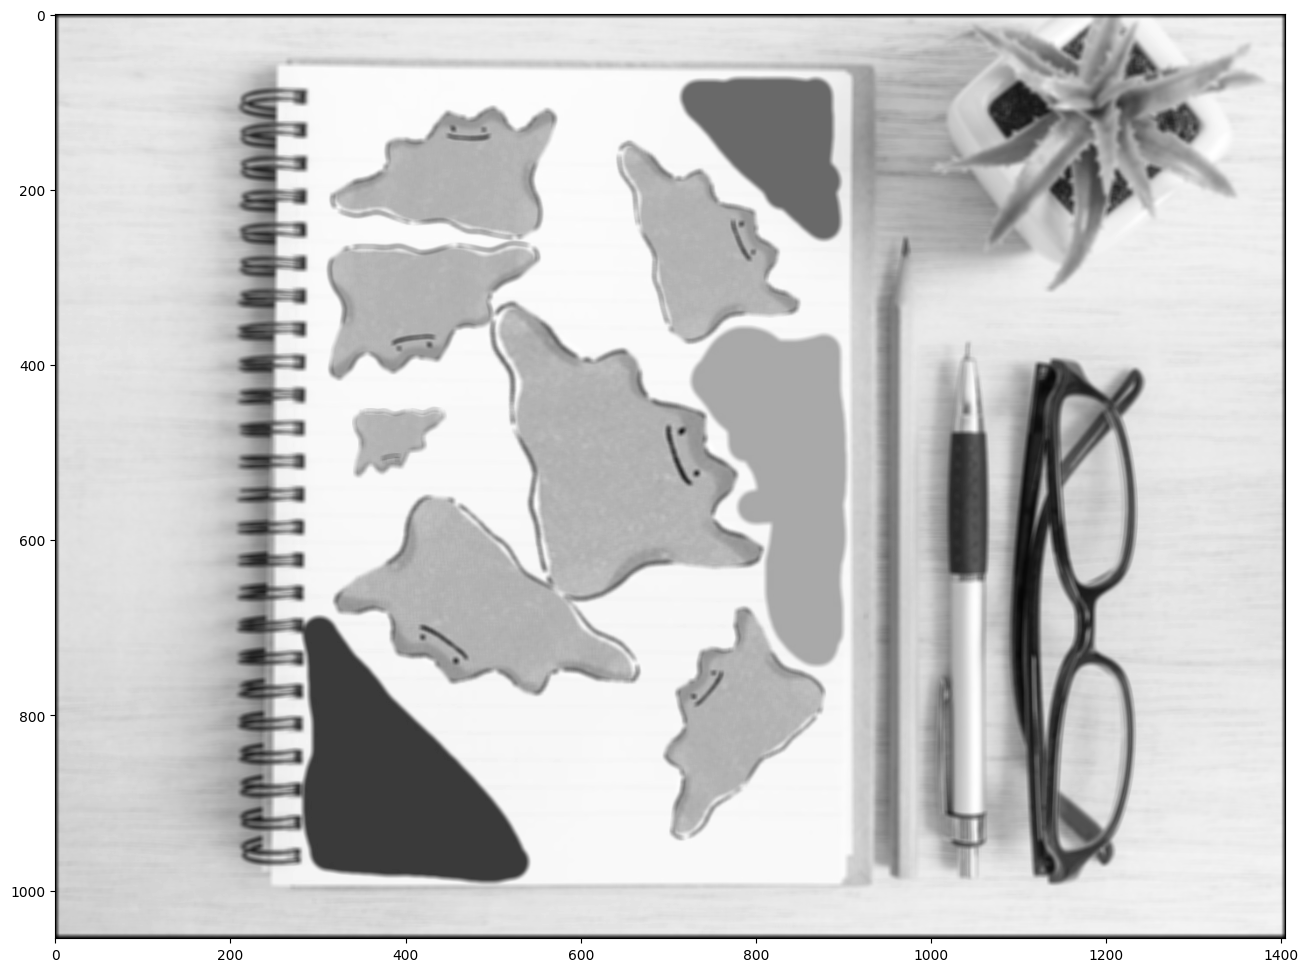

In [114]:
# BLUR
from scipy import signal

k_size = 6
k = (1./k_size*k_size) * np.ones((k_size, k_size))
image_blur = signal.convolve2d(img_gs, k)
plt.imshow(image_blur, 'gray')

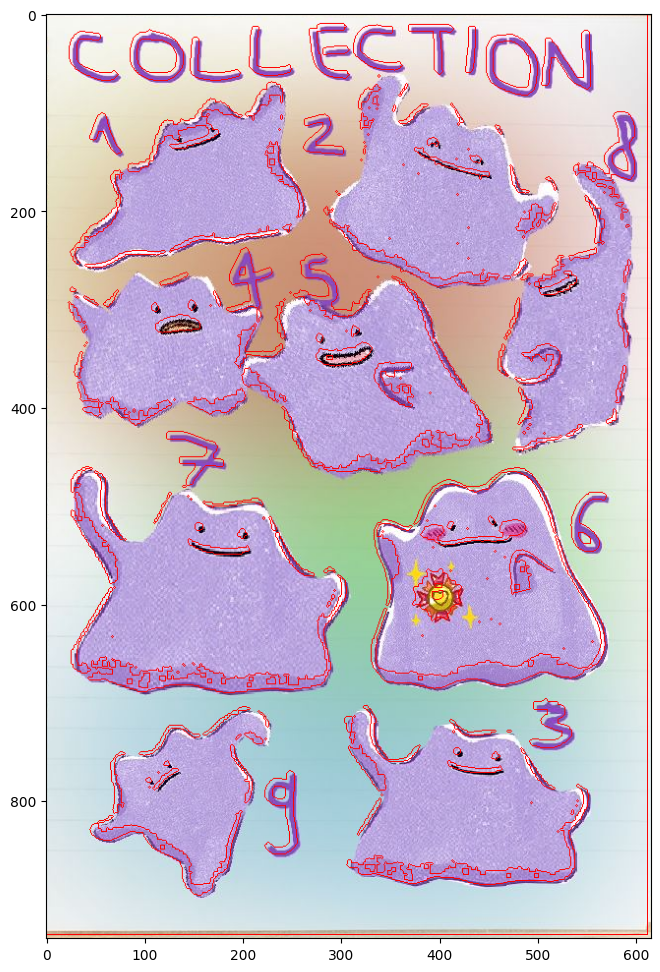

In [92]:
contours, hierarchy = cv2.findContours(img_dil, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img_cont = img[60:1000, 285:900].copy()
cv2.drawContours(img_cont, contours, -1, (255, 0, 0), 1)
plt.imshow(img_cont)

330
15


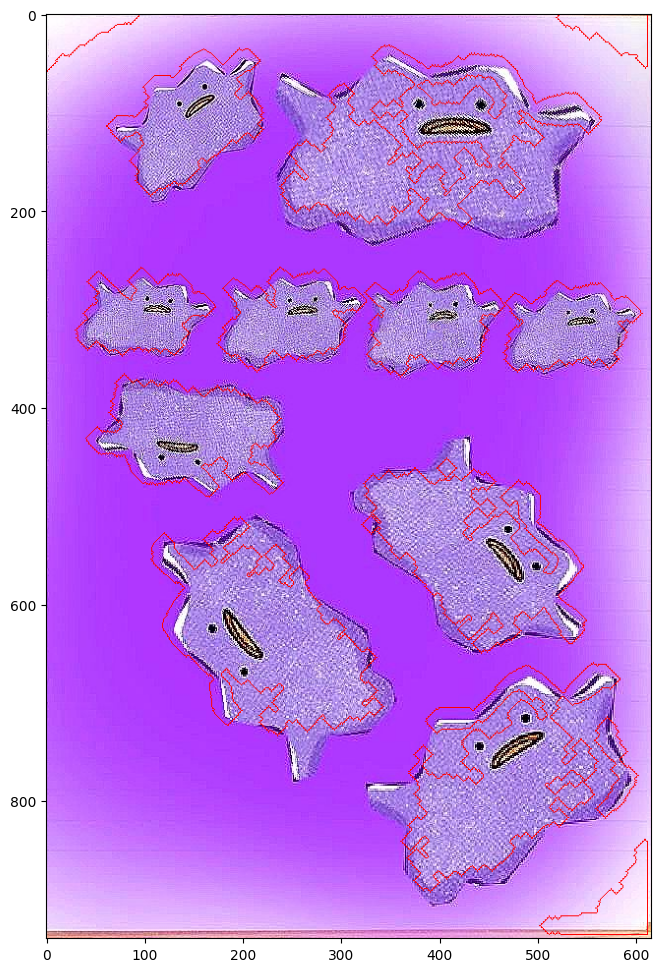

In [58]:
contours_ditto = [] # ovde ce biti samo konture koje pripadaju bar-kodu
print(len(contours))
for contour in contours: # za svaku konturu
    center, size, angle = cv2.minAreaRect(contour) # pronadji pravougaonik minimalne povrsine koji ce obuhvatiti celu konturu
    height, width = size

    if width > 40  and height > 40 : # uslov da kontura pripada bar-kodu
        contours_ditto.append(contour) # ova kontura pripada bar-kodu

img_final = img[60:1000, 285:900].copy()
cv2.drawContours(img_final, contours_ditto, -1, (255, 0, 0), 1)
print(len(contours_ditto))
plt.imshow(img_final)